# Agrupar los clientes según la intención de compra

El agrupamiento jerárquico es un método de análisis de grupos puntuales, el cual busca construir una jerarquía de grupos.

- Agrupamiento jerárquico

### Autores
   * Efrén Jiménez

## Análisis del Problema

La intención de compra puede tomar diversos matices y dimensiones. Para los efectos de un lanzamiento, la intención de compra la podemos medir como la probabilidad de que un consumidor compre mi producto, dadas una serie de variables que afectan dicha decisión de compra. Por ejemplo, si hallamos que, en promedio, los consumidores comprarán mi producto con una probabilidad del 90%, puedo hacer predicciones sobre los ingresos y la demanda en el corto plazo. Por el contrario, si dadas las características de mi producto los consumidores indican una probabilidad de compra digamos del 10%, tengo los elementos suficientes para desistir de ese lanzamiento, o bien, modificar los elementos del producto que no convencen a los consumidores.

![blackbell](https://storage.googleapis.com/kaggle-datasets-images/201937/444614/43548b386d303d76342f9bcea9caac4b/dataset-cover.jpg?t=2019-06-04-15-57-12)

### Librerías

In [189]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scipy

In [39]:
import warnings
warnings.filterwarnings('ignore')
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.cluster.hierarchy import dendrogram, ward

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')


## Entendimiento de los Datos

El total es de 12330  registro con 18 columnas dentro del set de datos de entrenamiento

El atributo 'Ingresos' se puede utilizar como etiqueta de clase.

"Administrativo", "Duración administrativa", "Informativo", "Duración informativa", "Relacionado con el producto" y "Duración relacionada con el producto" representan el número de diferentes tipos de páginas visitadas por el visitante en esa sesión y el tiempo total invertido en cada uno de estas categorías de página. Los valores de estas características se derivan de la información de URL de las páginas visitadas por el usuario y se actualizan en tiempo real cuando un usuario realiza una acción, p. Ej. pasar de una página a otra. Las funciones "Tasa de rebote", "Tasa de salida" y "Valor de la página" representan las métricas medidas por "Google Analytics" para cada página del sitio de comercio electrónico. El valor de la función "Tasa de rebote" para una página web se refiere al porcentaje de visitantes que ingresan al sitio desde esa página y luego se van ("rebotan") sin activar ninguna otra solicitud al servidor de análisis durante esa sesión. El valor de la función "Tasa de salida" para una página web específica se calcula como para todas las páginas vistas a la página, el porcentaje que fue el último en la sesión. La función "Valor de la página" representa el valor promedio de una página web que un usuario visitó antes de completar una transacción de comercio electrónico. La función "Día especial" indica la proximidad del tiempo de visita del sitio a un día especial específico (por ejemplo, el Día de la Madre, el Día de San Valentín) en el que es más probable que las sesiones finalicen con la transacción. El valor de este atributo se determina considerando la dinámica del comercio electrónico como la duración entre la fecha del pedido y la fecha de entrega. Por ejemplo, para el día de Valentina, este valor toma un valor distinto de cero entre el 2 de febrero y el 12 de febrero, cero antes y después de esta fecha a menos que esté cerca de otro día especial, y su valor máximo de 1 el 8 de febrero. El conjunto de datos también incluye operaciones sistema, navegador, región, tipo de tráfico, tipo de visitante como visitante recurrente o nuevo, un valor booleano que indica si la fecha de la visita es el fin de semana y el mes del año.

In [40]:
#Cargar los datos
online_shoppers_intention = pd.read_csv(r"data/online_shoppers_intention.csv",na_values='?')

In [41]:
online_shoppers_intention.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [42]:
#Primeros registros
online_shoppers_intention.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [43]:
#Describir dataset
online_shoppers_intention.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.317798,80.906176,0.503979,34.506387,31.763884,1196.037057,0.022152,0.043003,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.322754,176.860432,1.270701,140.825479,44.490339,1914.372511,0.048427,0.048527,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,185.000000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,599.766190,0.003119,0.025124,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.500000,0.000000,0.000000,38.000000,1466.479902,0.016684,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [44]:
#Información del dataset
online_shoppers_intention.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12316 non-null  float64
 1   Administrative_Duration  12316 non-null  float64
 2   Informational            12316 non-null  float64
 3   Informational_Duration   12316 non-null  float64
 4   ProductRelated           12316 non-null  float64
 5   ProductRelated_Duration  12316 non-null  float64
 6   BounceRates              12316 non-null  float64
 7   ExitRates                12316 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [45]:
# Numero de registros del dataset
print("Cantidad de registros:",len(online_shoppers_intention))
# Cantidad de columnas del dataset
print("Cantidad de columnas:",len(online_shoppers_intention.columns))
# Tipos de datos del dataset
print("Tipo de datos:",online_shoppers_intention.dtypes.unique())
# Tamaño del daset
print("Filas y columnas:",online_shoppers_intention.shape)

Cantidad de registros: 12330
Cantidad de columnas: 18
Tipo de datos: [dtype('float64') dtype('O') dtype('int64') dtype('bool')]
Filas y columnas: (12330, 18)


In [46]:
# Chekear valores nulos
print(online_shoppers_intention.isnull().any().sum(), ' / ', len(online_shoppers_intention.columns))

8  /  18


In [47]:
#Cuales columnnas estas con valores nulos
online_shoppers_intention.isnull().sum()[online_shoppers_intention.isnull().sum() > 0]

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
dtype: int64

In [48]:
# N/A= Valores vacios 
#Usar solo si se quiere eliminar los registros que contienen columnas vacías
online_shoppers_intention=online_shoppers_intention.dropna() 

In [49]:
online_shoppers_intention

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3.0,145.0,0.0,0.0,53.0,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0.0,0.0,0.0,0.0,5.0,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0.0,0.0,0.0,0.0,6.0,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4.0,75.0,0.0,0.0,15.0,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [50]:
online_shoppers_intention.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [51]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

online_shoppers_intention["Administrative"] =le.fit_transform(online_shoppers_intention["Administrative"])
online_shoppers_intention["Administrative_Duration"] =le.fit_transform(online_shoppers_intention["Administrative_Duration"])  
online_shoppers_intention["Informational"] =le.fit_transform(online_shoppers_intention["Informational"])  
online_shoppers_intention["Informational_Duration"] =le.fit_transform(online_shoppers_intention["Informational_Duration"])  
online_shoppers_intention["ProductRelated"] =le.fit_transform(online_shoppers_intention["ProductRelated"])  
online_shoppers_intention["ProductRelated_Duration"] =le.fit_transform(online_shoppers_intention["ProductRelated_Duration"])  
online_shoppers_intention["BounceRates"] =le.fit_transform(online_shoppers_intention["BounceRates"])  
online_shoppers_intention["ExitRates"] =le.fit_transform(online_shoppers_intention["ExitRates"])  
online_shoppers_intention["PageValues"] =le.fit_transform(online_shoppers_intention["PageValues"])  
online_shoppers_intention["SpecialDay"] =le.fit_transform(online_shoppers_intention["SpecialDay"])  
online_shoppers_intention["Month"] =le.fit_transform(online_shoppers_intention["Month"])  
online_shoppers_intention["OperatingSystems"] =le.fit_transform(online_shoppers_intention["OperatingSystems"])  
online_shoppers_intention["Browser"] =le.fit_transform(online_shoppers_intention["Browser"])  
online_shoppers_intention["Region"] =le.fit_transform(online_shoppers_intention["Region"]) 
online_shoppers_intention["TrafficType"] =le.fit_transform(online_shoppers_intention["TrafficType"])  
online_shoppers_intention["VisitorType"] =le.fit_transform(online_shoppers_intention["VisitorType"])  
online_shoppers_intention["Weekend"] =le.fit_transform(online_shoppers_intention["Weekend"])  
online_shoppers_intention["Revenue"] =le.fit_transform(online_shoppers_intention["Revenue"])  

## Exploración de los Datos

#### Gráficos exploratorios

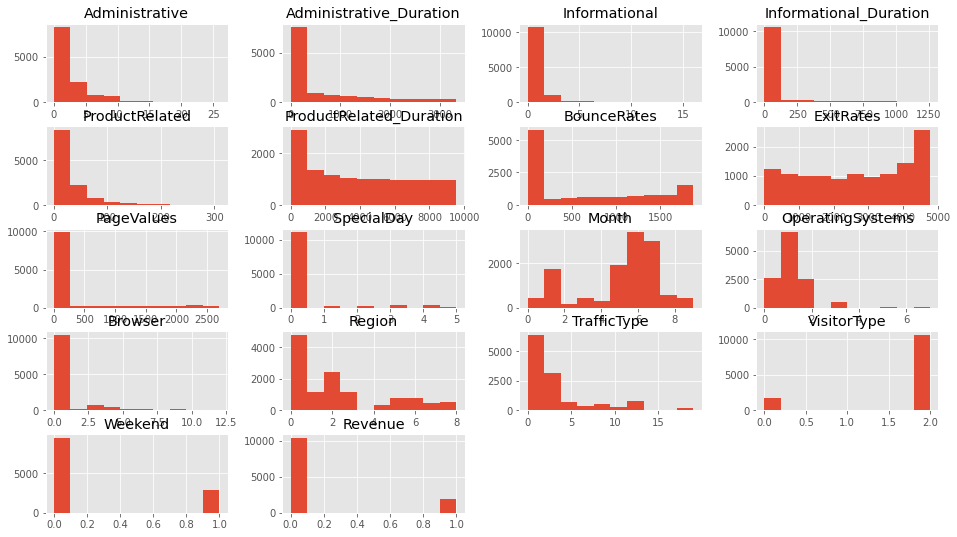

In [52]:
online_shoppers_intention.hist()
plt.show()

## Modelo de Machine Learning

Una vez seleccionadas las variables para incluir en el modelo de regresión, se procede a crearlo:

In [53]:
linked_array = ward(online_shoppers_intention)

In [54]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)
    plt.figure(figsize=(15,10))
    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

In [55]:
linked_array

array([[1.00230000e+04, 1.10290000e+04, 0.00000000e+00, 2.00000000e+00],
       [8.18100000e+03, 9.55400000e+03, 0.00000000e+00, 2.00000000e+00],
       [8.50000000e+01, 1.58000000e+02, 0.00000000e+00, 2.00000000e+00],
       ...,
       [2.46250000e+04, 2.46260000e+04, 1.47656433e+05, 5.65900000e+03],
       [2.46220000e+04, 2.46270000e+04, 1.71491587e+05, 6.65700000e+03],
       [2.46280000e+04, 2.46290000e+04, 4.16185173e+05, 1.23160000e+04]])

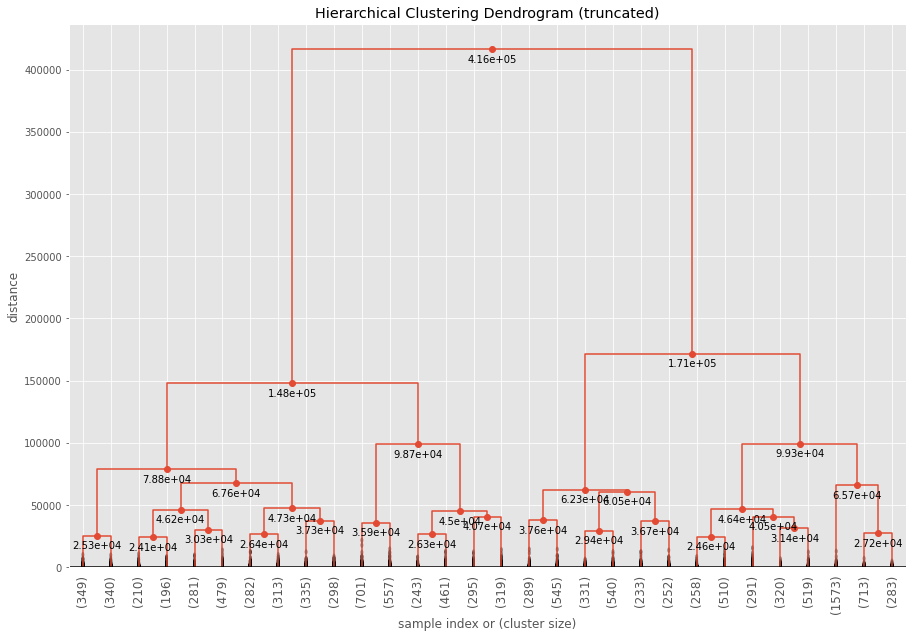

In [56]:
fancy_dendrogram(
    linked_array,
    truncate_mode='lastp',
    p=30,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,
    max_d=80
)

plt.show()

In [34]:
print('Distnacia de los ultimos :\n{}'.format(linked_array[-5:,2]))

distances for the last 5 merges:
[ 98651.32687024  99346.34567537 147656.43253262 171491.58747038
 416185.17272871]


## Resultados
En conclusión, Se debe selecionar la profundidad de la herencia.